# Package Import (Must Run)

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
import string
import re
from nltk.stem import PorterStemmer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Constants and Helper Functions (Must Run)

In [3]:
#-----------------------------Constants-----------------------------------#
k = 50

COMPUTER_TECHNOLOGY = 0

RECREATIONAL_ACTIVITY = 1

# index of the last computer technology data group in variable 'categories'
LAST_COMPUTER_TECHNOLOGY_INDEX = 3


#-----------------------------Helper Functions----------------------------#

def tokenizer_stem(text):
    # Convert each punctuation character to empty character.
    punc_remove_map = text.maketrans('', '', string.punctuation)
    text_no_punc = text.translate(punc_remove_map)
    
    # remove non-ascii characters
    ascii_text_no_punc = "".join(ch for ch in text_no_punc if ord(ch) < 128) 
    
    # Convert words that share the same stem to the stem
    tokens = ascii_text_no_punc.split()
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(n) for n in tokens]
    return stemmed_tokens


#define a function to extract 10 most significant terms
def ten_most_significant_terms(index):
    topwords = []
    presentclass = allwords_tficf.toarray()[index]
    topindices = sorted(range(len(presentclass)), key = lambda index: presentclass[index])[-10:]
    for index in topindices:
        topwords.append(count_vectorizer_min_df_2.get_feature_names()[index])
    return topwords



def get_target_values(target_array):
    target_values = []
    for n in range(target_array.shape[0]):
        if target_array[n] <= LAST_COMPUTER_TECHNOLOGY_INDEX:
            target_values.append(COMPUTER_TECHNOLOGY)
        else:
            target_values.append(RECREATIONAL_ACTIVITY)
    return np.array(target_values)


# Plotting ROC curve 
def plot_roc_curve(target_values, predicted_prob, roc_title):
    
    fpr, tpr, thresholds = roc_curve(target_values, predicted_prob)
    area_under_roc = auc(fpr,tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(roc_title)
    plt.legend(loc="lower right")
    plt.show()


# confusion matrix, accuracy, recall and precision
def compute_prediction_stats(target_values, predicted_data):
    
    confusionmatrix = confusion_matrix(target_values, predicted_data)
    accuracy = accuracy_score(target_values, predicted_data)
    precision = precision_score(target_values, predicted_data)
    recall = recall_score(target_values, predicted_data)
    print("confusion matrix")
    print(confusionmatrix)
    print("accuracy =",accuracy)
    print("precision =", precision)
    print("recall =",recall)

# Classification Preparation Variables (Must Run)

In [5]:
# Extract datasets
categories = ['comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey']

eight_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
eight_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Set labels for binary classifiers
eight_train_target = get_target_values(eight_train.target)
eight_test_target = get_target_values(eight_test.target)

# Initialize term count vectorizers
count_vectorizer_min_df_2 = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenizer_stem,
    stop_words = ENGLISH_STOP_WORDS,
    min_df = 2
)

count_vectorizer_min_df_5 = CountVectorizer(
    analyzer ='word',
    tokenizer = tokenizer_stem,
    stop_words = ENGLISH_STOP_WORDS,
    min_df = 5
)

# TFIDF transformer for problem c-j
tfidf_transformer = TfidfTransformer()


# Dimension Reduction Models
# Latent Sematic Analysis(LSA)
lsa_model = TruncatedSVD(n_components=k, random_state=42)
# Non-Negative Matrix Factorization (NMF)
nmf_model = NMF(k, random_state = 42)

 # Problem a

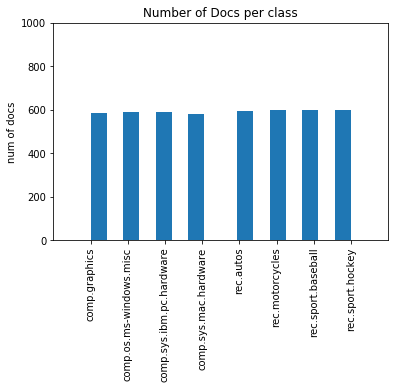

In [5]:
plt.hist(eight_train.target, bins = 16, align = 'mid')
plt.title('Number of Docs per class')
plt.ylabel('num of docs')
plt.xticks(range(8),categories,rotation = 90)
plt.xlim([-1,8])
plt.ylim([0,1000])
plt.show()


# Problem b

In [6]:
count_min_df_2 = count_vectorizer_min_df_2.fit_transform(eight_train.data)
count_min_df_5 = count_vectorizer_min_df_5.fit_transform(eight_train.data)

print ("Final Number of Terms Extracted :" + str(count_min_df_2.shape[1]))
print ("Final Number of Terms Extracted :" + str(count_min_df_5.shape[1]))

Final Number of Terms Extracted :21842
Final Number of Terms Extracted :8928


# Problem c

In [9]:
twenty_train = fetch_20newsgroups(subset='train')
twenty_train_target = twenty_train.target_names  # extract all the class names


allwords = []
# organize words in 20 categories of data in one matrix
for counter in range(20):
    allwords.append("")
for index in range(len(twenty_train.data)):
    category = twenty_train.target[index]
    allwords[category] = allwords[category] + " " + twenty_train.data[index]
    

#After stemming and tokenizing, performing tficf    
allwords_count_min_df_2 = count_vectorizer_min_df_2.fit_transform(allwords)
allwords_tficf = tfidf_transformer.fit_transform(allwords_count_min_df_2)

index_ibm = twenty_train_target.index("comp.sys.ibm.pc.hardware")
index_mac = twenty_train_target.index("comp.sys.mac.hardware")
index_forsale = twenty_train_target.index("misc.forsale")
index_christian = twenty_train_target.index("soc.religion.christian")

most_significant_words_ibm = ten_most_significant_terms(index_ibm)
most_significant_words_mac = ten_most_significant_terms(index_mac)
most_significant_words_forsale = ten_most_significant_terms(index_forsale)
most_significant_words_christian = ten_most_significant_terms(index_christian)

print("10 most significant terms for comp.sys.ibm.pc.hardware", most_significant_words_ibm)
print("10 most significant terms for comp.sys.mac.hardware", most_significant_words_mac)
print("10 most significant terms for misc.forsale", most_significant_words_forsale)
print("10 most significant terms for soc.religion.christian", most_significant_words_christian)

10 most significant terms for comp.sys.ibm.pc.hardware ['control', 'card', 'organ', 'subject', 'line', 'use', 'ide', 'thi', 'scsi', 'drive']
10 most significant terms for comp.sys.mac.hardware ['problem', 'appl', 'simm', 'quadra', 'use', 'organ', 'subject', 'mac', 'line', 'thi']
10 most significant terms for misc.forsale ['use', 'new', 'thi', 'univers', '2', 'organ', 'sale', '1', 'subject', 'line']
10 most significant terms for soc.religion.christian ['line', 'peopl', 'subject', 'church', 'hi', 'jesu', 'christian', 'wa', 'god', 'thi']


# Problem d

In [7]:
# Compute tfidf matrix
eight_train_tfidf_min_df_2 = tfidf_transformer.fit_transform(count_min_df_2)
eight_train_tfidf_min_df_5 = tfidf_transformer.fit_transform(count_min_df_5)


# Dense matrices computed using LSA
eight_train_tfidf_min_df_2_lsa = lsa_model.fit_transform(eight_train_tfidf_min_df_2)
eight_train_tfidf_min_df_5_lsa = lsa_model.fit_transform(eight_train_tfidf_min_df_5)


# Dense matrices computed using NMF
eight_train_tfidf_min_df_2_nmf = nmf_model.fit_transform(eight_train_tfidf_min_df_2)
eight_train_tfidf_min_df_5_nmf = nmf_model.fit_transform(eight_train_tfidf_min_df_5)


# Problem e

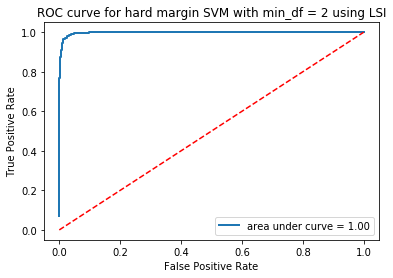

confusion matrix
[[1508   52]
 [  22 1568]]
accuracy = 0.976507936508
precision = 0.967901234568
recall = 0.986163522013


In [31]:
#performing hard margin SVM classifier for min_df = 2 using LSI
hard_min2_pipelined = Pipeline([
    ('vect', count_vectorizer_min_df_2),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', SVC(C = 1000, probability = True))
])


hard_min2_pipelined = hard_min2_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for hard margin SVM with min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)




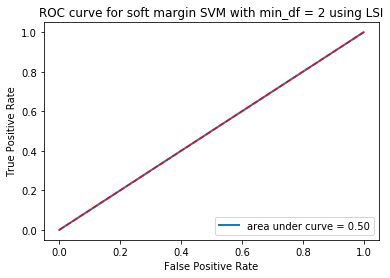

confusion matrix
[[   0 1560]
 [   0 1590]]
accuracy = 0.504761904762
precision = 0.504761904762
recall = 1.0


In [32]:
#performing soft margin SVM classifier for min_df = 2 using LSI
soft_min2_pipelined = Pipeline([
    ('vect', count_vectorizer_min_df_2),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', SVC(C = 0.001, probability = True))
])

soft_min2_pipelined = soft_min2_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = soft_min2_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = soft_min2_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for soft margin SVM with min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

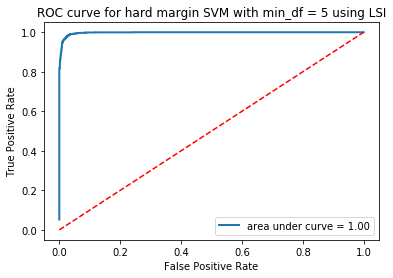

confusion matrix
[[1511   49]
 [  24 1566]]
accuracy = 0.976825396825
precision = 0.969659442724
recall = 0.984905660377


In [34]:
#performing hard margin SVM classifier for min_df = 5 using LSI
hard_min5_pipelined = Pipeline([
    ('vect', count_vectorizer_min_df_5),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', SVC(C = 1000, probability = True))
])


hard_min5_pipelined = hard_min5_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = hard_min5_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = hard_min5_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for hard margin SVM with min_df = 5 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)




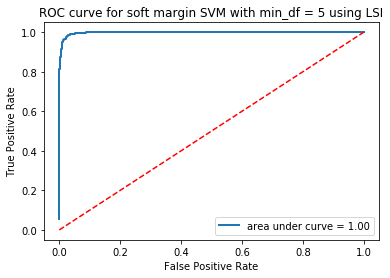

confusion matrix
[[1511   49]
 [  24 1566]]
accuracy = 0.976825396825
precision = 0.969659442724
recall = 0.984905660377


In [7]:
#performing soft margin SVM classifier for min_df = 5 using LSI
soft_min5_pipelined = Pipeline([
    ('vect', count_vectorizer_min_df_5),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', SVC(C = 1000, probability = True))
])

soft_min5_pipelined = soft_min5_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = soft_min5_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = soft_min5_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for soft margin SVM with min_df = 5 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

# Problem g

## min_df = 2

### LSI

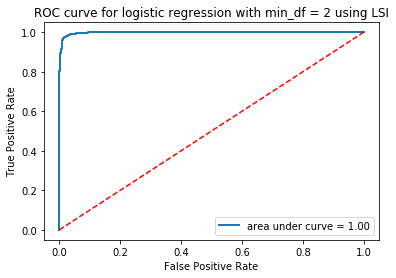

confusion matrix
[[1510   50]
 [  22 1568]]
accuracy = 0.977142857143
precision = 0.969097651422
recall = 0.986163522013


In [9]:
#performing logistic regression classifier for min_df = 2 using LSI
pipeline = Pipeline([
    ('vect', count_vectorizer_min_df_2),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', LogisticRegression(C = 1000))
])

pipeline = pipeline.fit(eight_train.data, eight_train_target)
predicted_prob = pipeline.predict_proba(eight_test.data)[:,1]
predicted_data = pipeline.predict(eight_test.data)

roc_title = 'ROC curve for logistic regression with min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

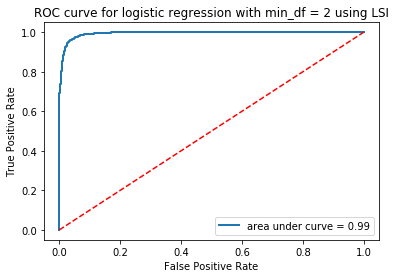

confusion matrix
[[ 756  804]
 [   0 1590]]
accuracy = 0.744761904762
precision = 0.664160401003
recall = 1.0


In [10]:
#performing logistic regression classifier for min_df = 2 using LSI
pipeline = Pipeline([
    ('vect', count_vectorizer_min_df_2),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', LogisticRegression(C = 0.001))
])

pipeline = pipeline.fit(eight_train.data, eight_train_target)
predicted_prob = pipeline.predict_proba(eight_test.data)[:,1]
predicted_data = pipeline.predict(eight_test.data)

roc_title = 'ROC curve for logistic regression with min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

### NMF

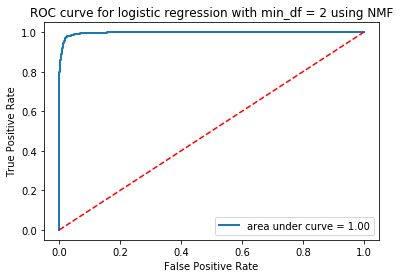

confusion matrix
[[1488   72]
 [  23 1567]]
accuracy = 0.969841269841
precision = 0.956070774863
recall = 0.985534591195


In [14]:
#performing logistic regression classifier for min_df = 2 using NMF
pipeline = Pipeline([
    ('vect', count_vectorizer_min_df_2),
    ('tfidf', tfidf_transformer),
    ('svd', nmf_model),
    ('clf', LogisticRegression(C = 1000))
])

pipeline = pipeline.fit(eight_train.data, eight_train_target)
predicted_prob = pipeline.predict_proba(eight_test.data)[:,1]
predicted_data = pipeline.predict(eight_test.data)

roc_title = 'ROC curve for logistic regression with min_df = 2 using NMF'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

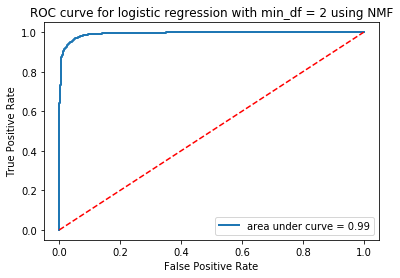

confusion matrix
[[   0 1560]
 [   0 1590]]
accuracy = 0.504761904762
precision = 0.504761904762
recall = 1.0


In [15]:
#performing logistic regression classifier for min_df = 2 using NMF
pipeline = Pipeline([
    ('vect', count_vectorizer_min_df_2),
    ('tfidf', tfidf_transformer),
    ('svd', nmf_model),
    ('clf', LogisticRegression(C = 0.001))
])

pipeline = pipeline.fit(eight_train.data, eight_train_target)
predicted_prob = pipeline.predict_proba(eight_test.data)[:,1]
predicted_data = pipeline.predict(eight_test.data)

roc_title = 'ROC curve for logistic regression with min_df = 2 using NMF'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

## min_df = 5

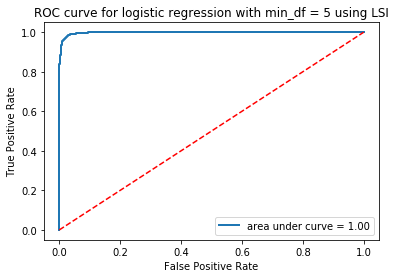

confusion matrix
[[1512   48]
 [  24 1566]]
accuracy = 0.977142857143
precision = 0.970260223048
recall = 0.984905660377


In [8]:
#performing logistic regression classifier for min_df = 5 using LSI
pipeline = Pipeline([
    ('vect', count_vectorizer_min_df_5),
    ('tfidf', tfidf_transformer),
    ('svd', lsa_model),
    ('clf', LogisticRegression(C = 1000))
])

pipeline = pipeline.fit(eight_train.data, eight_train_target)
predicted_prob = pipeline.predict_proba(eight_test.data)[:,1]
predicted_data = pipeline.predict(eight_test.data)

roc_title = 'ROC curve for logistic regression with min_df = 5 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

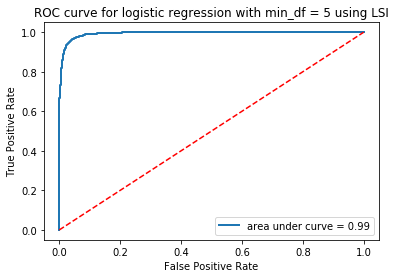

confusion matrix
[[ 896  664]
 [   0 1590]]
accuracy = 0.789206349206
precision = 0.705412599823
recall = 1.0


In [6]:
#performing logistic regression classifier for min_df = 5 using LSI
pipeline = Pipeline([
                                ('vect', count_vectorizer_min_df_5),
                                ('tfidf', tfidf_transformer),
                                ('svd', lsa_model),
                                ('clf', LogisticRegression(C = 0.001))
])

pipeline = pipeline.fit(eight_train.data, eight_train_target)
predicted_prob = pipeline.predict_proba(eight_test.data)[:,1]
predicted_data = pipeline.predict(eight_test.data)

roc_title = 'ROC curve for logistic regression with min_df = 5 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)